In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [8]:
# Parâmetros
sigma = 1.5 # atenção => tem que ser diferente de 1
beta = 0.9932
q_low = 0.9
q_high = 1.1
a_min = -6
a_max = 4
num_points = 300
y_L = 0.1
y_H = 1.0

# Matriz de transição
pi_HH = 0.925
pi_HL = 0.5
pi_LH = 1 - pi_HH
pi_LL = 1 - pi_HL

# Função de utilidade
def U(c):
    return (c ** (1 - sigma)) / (1 - sigma)

# Grids
a_grid = np.linspace(a_min, a_max, num_points)
y_grid = np.array([y_L, y_H])
pi = np.array([[pi_LL, pi_LH], [pi_HL, pi_HH]])

# Iteração de bissecção
tol = 1e-6
max_iter = 2000
_iter = 0

start_time = time.time()

while (q_high - q_low) / 2 > tol and _iter < max_iter:
    d = (q_high + q_low) / 2  # Atualiza o valor de q para o ponto médio
    dist = 10  # Reinicializa a variável dist para a nova iteração
    V = np.zeros((num_points, 2))  # Reinicializa a função valor
    B = 1  # Reinicializa B

    # Iteração de Bellman
    for bellman_iter in range(max_iter):
        if dist < tol:
            break
        V_new = np.zeros_like(V)
        pol_a = np.zeros_like(V)
        for j in range(2):
            y = y_grid[j]
            for i in range(num_points):
                a = a_grid[i]
                c = np.maximum(a + y - d * a_grid, 0) + np.finfo(float).eps * (a + y - d * a_grid < 0)
                expected_value = V @ pi[:, j]
                value = U(c) + beta * expected_value
                V_new[i, j], pol_pos = np.max(value), np.argmax(value)
                pol_a[i, j] = a_grid[pol_pos]

        dist = np.max(np.abs(V_new - V))
        V = V_new.copy()

    # Cálculo da distribuição estacionária
    A1 = np.zeros((num_points, num_points))
    A2 = np.zeros_like(A1)

    for i in range(num_points):
        for j in range(num_points):
            A1[i, j] = pol_a[i, 0] == a_grid[j]
            A2[i, j] = pol_a[i, 1] == a_grid[j]

    M = np.block([[pi[0, 0] * A1, pi[0, 1] * A2],
                  [pi[1, 0] * A1, pi[1, 1] * A2]])

    stationary_dist = np.linalg.matrix_power(M, 1000)
    stationary_dist = stationary_dist[0, :]
    stationary_dist = np.column_stack((stationary_dist[:num_points], stationary_dist[num_points:]))

    B = -np.sum(stationary_dist.T @ pol_a)

    if abs(B) < tol:
        break
    elif B > 0:
        q_high = d  # Ajusta o limite superior
    else:
        q_low = d  # Ajusta o limite inferior

    _iter += 1

end_time = time.time()

print(f'Valor final de q: {d}')
print(f'Valor final de B: {B}')
print(f'Número de iterações: {_iter}')
print(f'Tempo de execução: {end_time - start_time:.2f} segundos')
print(f'Tempo de execução: { (end_time - start_time)/60:.2f} minutos')

C:\Users\guilh\AppData\Local\Temp\ipykernel_64000\4276221596.py:20: RuntimeWarning: divide by zero encountered in power
  return (c ** (1 - sigma)) / (1 - sigma)


Valor final de q: 0.9939804077148436
Valor final de B: -0.005146908837790426
Número de iterações: 17
Tempo de execução: 890.71 segundos
Tempo de execução: 14.85 minutos


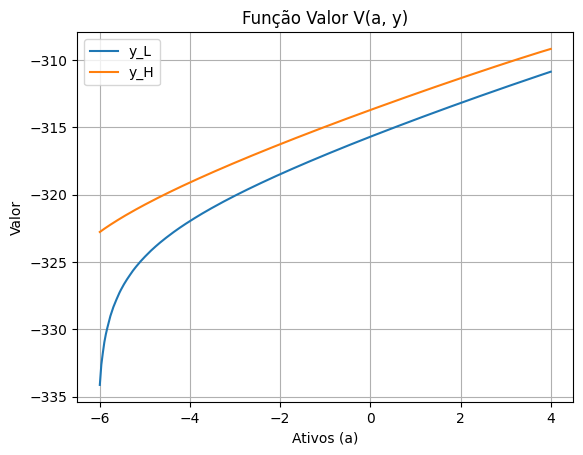

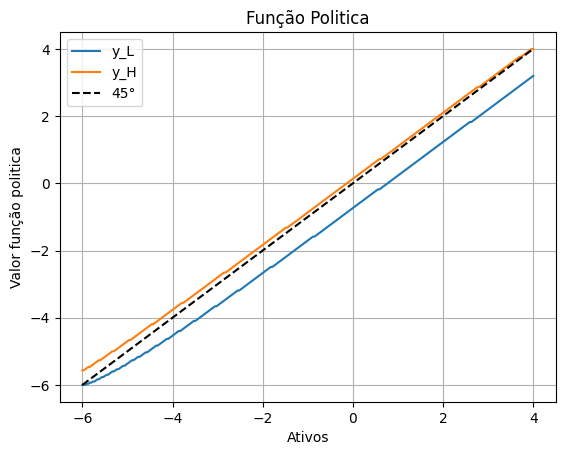

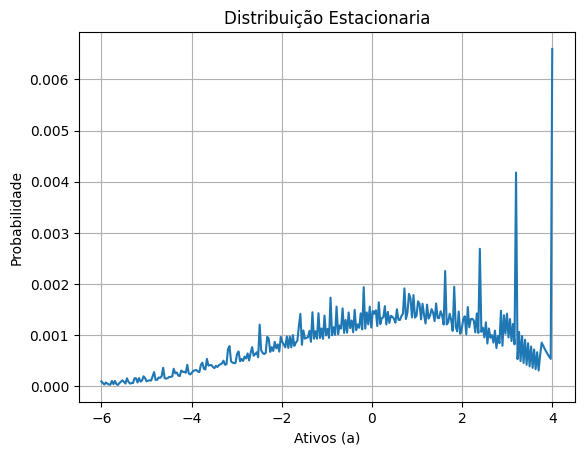

Soma das distribuições estacionarias da função politica: : -0.005146908837790426


In [9]:
# Plotting
plt.figure()
plt.plot(a_grid, V[:, 0], label='y_L', linewidth=1.5)
plt.plot(a_grid, V[:, 1], label='y_H', linewidth=1.5)
plt.title('Função Valor V(a, y)')
plt.xlabel('Ativos (a)')
plt.ylabel('Valor')
plt.legend(loc='best')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(a_grid, pol_a[:, 0], label='y_L', linewidth=1.5)
plt.plot(a_grid, pol_a[:, 1], label='y_H', linewidth=1.5)
plt.plot(a_grid, a_grid, 'k--')
plt.title('Função Politica')
plt.xlabel('Ativos')
plt.ylabel('Valor função politica')
plt.legend(['y_L', 'y_H', '45°'], loc='best')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(a_grid, stationary_dist.sum(axis=1), linewidth=1.5)
plt.title('Distribuição Estacionaria')
plt.xlabel('Ativos (a)')
plt.ylabel('Probabilidade')
plt.grid(True)
plt.show()

print(f'Soma das distribuições estacionarias da função politica: : {B}')
